# Midterm Assignment: Analyzing Clean Energy Power Plants in California (Revised)

Author: Suzanne Caflisch

Description: This project visualizes where clean energy jobs are located across the state of California (by county). Ultimately, my group will use this data comparatively, analyzing it next to fossil fuel jobs by California county, and also demographic data across different regions of California, gathered from CalEnviroScreen 3.0 data. That will allow us to make arguments about which communities are burdened by environmental hazards, and which communities stand to gain and lose jobs from the transition from dirty to clean energy in the state. We will use County Business Patterns (CBP) data from 2018, drawn from the US Census Bureau, and the CA County Boundaries data set (also from the US Census Bureau).


In [1]:
#importing geopandas for visualization of data
import geopandas as gpd

# for general data wrangling tasks
import pandas as pd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

#importing census data

clean = gpd.read_file('NAICSclean.csv')

In [2]:
#getting general information about the data set

clean.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   GEO_ID           37 non-null     object  
 1   NAME             37 non-null     object  
 2   NAICS2017        37 non-null     object  
 3   NAICS2017_LABEL  37 non-null     object  
 4   NAICS2017_F      37 non-null     object  
 5   LFO              37 non-null     object  
 6   LFO_LABEL        37 non-null     object  
 7   EMPSZES          37 non-null     object  
 8   EMPSZES_LABEL    37 non-null     object  
 9   YEAR             37 non-null     object  
 10  ESTAB            37 non-null     object  
 11  PAYANN           37 non-null     object  
 12  PAYANN_N         37 non-null     object  
 13  PAYQTR1          37 non-null     object  
 14  PAYQTR1_N        37 non-null     object  
 15  EMP              37 non-null     object  
 16  EMP_N            37 non-null     objec

In [3]:
#determining the number of rows and columns in the file

clean.shape

(37, 18)

In [4]:
#examining the first rows of data

clean.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,NAICS2017_F,LFO,LFO_LABEL,EMPSZES,EMPSZES_LABEL,YEAR,ESTAB,PAYANN,PAYANN_N,PAYQTR1,PAYQTR1_N,EMP,EMP_N,geometry
0,id,Geographic Area Name,2017 NAICS code,Meaning of NAICS code,2017 NAICS Footnote,Legal form of organization code,Meaning of Legal form of organization code,Employment size of establishments,Meaning of Employment size of establishments,Year,Number of establishments,"Annual payroll ($1,000)",Noise range for annual payroll,"First-quarter payroll ($1,000)",Noise range for first-quarter payroll (%),Number of employees,Noise range for number of paid employees for p...,None
1,0500000US06001,"Alameda County, California",221115,Wind electric power generation,null,001,All establishments,001,All establishments,2018,4,5102,G,1779,G,47,G,None
2,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,3,268,G,88,G,5,G,None
3,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,210,Establishments with less than 5 employees,2018,3,N,N,N,N,N,N,None
4,0500000US06013,"Contra Costa County, California",221114,Solar electric power generation,null,001,All establishments,001,All establishments,2018,4,9589,G,2695,H,72,G,None


In [5]:
#dropping the first cell from the data set

clean = clean.drop([0])
clean.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,NAICS2017_F,LFO,LFO_LABEL,EMPSZES,EMPSZES_LABEL,YEAR,ESTAB,PAYANN,PAYANN_N,PAYQTR1,PAYQTR1_N,EMP,EMP_N,geometry
1,0500000US06001,"Alameda County, California",221115,Wind electric power generation,null,001,All establishments,001,All establishments,2018,4,5102,G,1779,G,47,G,None
2,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,3,268,G,88,G,5,G,None
3,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,210,Establishments with less than 5 employees,2018,3,N,N,N,N,N,N,None
4,0500000US06013,"Contra Costa County, California",221114,Solar electric power generation,null,001,All establishments,001,All establishments,2018,4,9589,G,2695,H,72,G,None
5,0500000US06019,"Fresno County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,4,9552,J,2470,J,100,J,None


In [6]:
# get county boundaries from LA open data
counties = gpd.read_file('https://opendata.arcgis.com/datasets/a61c138d0a6946da8d1ebb8d1c9db13a_0.geojson')
counties.head()

,OBJECTID,COUNTY_NAME,COUNTY_ABBREV,COUNTY_NUM,COUNTY_CODE,COUNTY_FIPS,ISLAND,geometry
0,1,Alameda,ALA,1,01,001,None,"POLYGON ((-122.27125 37.90503, -122.27061 37.9..."
1,2,Alpine,ALP,2,02,003,None,"POLYGON ((-119.58667 38.71420, -119.60704 38.7..."
2,3,Amador,AMA,3,03,005,None,"POLYGON ((-120.07246 38.70276, -120.07267 38.7..."
3,4,Butte,BUT,4,04,007,None,"POLYGON ((-121.07661 39.59729, -121.07660 39.5..."
4,5,Calaveras,CAL,5,05,009,None,"POLYGON ((-120.01792 38.43586, -120.02877 38.4..."


In [7]:
# trim the data to the bare minimum columns
counties = counties[['COUNTY_NAME', 'COUNTY_CODE','COUNTY_FIPS','geometry']]
counties.head()

,COUNTY_NAME,COUNTY_CODE,COUNTY_FIPS,geometry
0,Alameda,01,001,"POLYGON ((-122.27125 37.90503, -122.27061 37.9..."
1,Alpine,02,003,"POLYGON ((-119.58667 38.71420, -119.60704 38.7..."
2,Amador,03,005,"POLYGON ((-120.07246 38.70276, -120.07267 38.7..."
3,Butte,04,007,"POLYGON ((-121.07661 39.59729, -121.07660 39.5..."
4,Calaveras,05,009,"POLYGON ((-120.01792 38.43586, -120.02877 38.4..."


In [8]:
# creating new variable, COUNTY_FIPS. it's equal to geo_ID, minus the first string of numbers

clean['COUNTY_FIPS']=clean['GEO_ID'].str.lstrip('0500000US06')

In [9]:
#looking at the data again -- the new variable COUNTY_FIPS is showing up

clean.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,NAICS2017_F,LFO,LFO_LABEL,EMPSZES,EMPSZES_LABEL,YEAR,ESTAB,PAYANN,PAYANN_N,PAYQTR1,PAYQTR1_N,EMP,EMP_N,geometry,COUNTY_FIPS
1,0500000US06001,"Alameda County, California",221115,Wind electric power generation,null,001,All establishments,001,All establishments,2018,4,5102,G,1779,G,47,G,None,1
2,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,3,268,G,88,G,5,G,None,13
3,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,210,Establishments with less than 5 employees,2018,3,N,N,N,N,N,N,None,13
4,0500000US06013,"Contra Costa County, California",221114,Solar electric power generation,null,001,All establishments,001,All establishments,2018,4,9589,G,2695,H,72,G,None,13
5,0500000US06019,"Fresno County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,4,9552,J,2470,J,100,J,None,19


In [10]:
# filling in the missing digits to the FIPS column. Filling with leading zeros in any case that there are less characters. Important to ensure that there are 3 characters.

clean['COUNTY_FIPS']=clean['COUNTY_FIPS'].str.zfill(3)
clean.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,NAICS2017_F,LFO,LFO_LABEL,EMPSZES,EMPSZES_LABEL,YEAR,ESTAB,PAYANN,PAYANN_N,PAYQTR1,PAYQTR1_N,EMP,EMP_N,geometry,COUNTY_FIPS
1,0500000US06001,"Alameda County, California",221115,Wind electric power generation,null,001,All establishments,001,All establishments,2018,4,5102,G,1779,G,47,G,None,001
2,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,3,268,G,88,G,5,G,None,013
3,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,210,Establishments with less than 5 employees,2018,3,N,N,N,N,N,N,None,013
4,0500000US06013,"Contra Costa County, California",221114,Solar electric power generation,null,001,All establishments,001,All establishments,2018,4,9589,G,2695,H,72,G,None,013
5,0500000US06019,"Fresno County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,4,9552,J,2470,J,100,J,None,019


In [11]:
#merging the counties and clean data sets together, corresponding with the value COUNTY_FIPS.

clean = clean.merge(counties, on='COUNTY_FIPS')

In [12]:
clean.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,NAICS2017_F,LFO,LFO_LABEL,EMPSZES,EMPSZES_LABEL,YEAR,...,PAYANN_N,PAYQTR1,PAYQTR1_N,EMP,EMP_N,geometry_x,COUNTY_FIPS,COUNTY_NAME,COUNTY_CODE,geometry_y
0,0500000US06001,"Alameda County, California",221115,Wind electric power generation,null,001,All establishments,001,All establishments,2018,...,G,1779,G,47,G,None,001,Alameda,01,"POLYGON ((-122.27125 37.90503, -122.27061 37.9..."
1,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,...,G,88,G,5,G,None,013,Contra Costa,07,"POLYGON ((-121.57386 38.09003, -121.57398 38.0..."
2,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,210,Establishments with less than 5 employees,2018,...,N,N,N,N,N,None,013,Contra Costa,07,"POLYGON ((-121.57386 38.09003, -121.57398 38.0..."
3,0500000US06013,"Contra Costa County, California",221114,Solar electric power generation,null,001,All establishments,001,All establishments,2018,...,G,2695,H,72,G,None,013,Contra Costa,07,"POLYGON ((-121.57386 38.09003, -121.57398 38.0..."
4,0500000US06019,"Fresno County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,...,J,2470,J,100,J,None,019,Fresno,10,"POLYGON ((-119.01993 37.58366, -119.02072 37.5..."


Now, I must rename the geometry column and merge the DF as a geodataframe.

In [13]:
#renaming geometry column
clean=clean.rename(columns={'geometry_y':'geometry'})

In [14]:
#merging the DF as a geodataframe

clean = gpd.GeoDataFrame(clean)

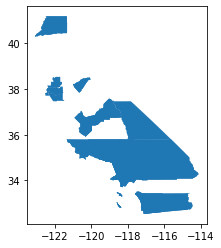

In [15]:
#plotting the data

clean.plot()

It worked! The geometry column is now showing up in the data set. Note the data is polygon, which should map the counties of California.

In [16]:
#Now, I want to see how many lines correspond to each county in the data frame.

clean['NAME'].value_counts()

Los Angeles County, California        15
Kern County, California                4
San Diego County, California           4
Contra Costa County, California        3
Orange County, California              2
San Luis Obispo County, California     2
Imperial County, California            2
San Bernardino County, California      2
Shasta County, California              2
Fresno County, California              2
San Francisco County, California       1
Solano County, California              1
Alameda County, California             1
Inyo County, California                1
Name: NAME, dtype: int64

In [17]:
#I can see all 15 rows of LA county data by running this command.

clean[clean.NAME == 'Los Angeles County, California']

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,NAICS2017_F,LFO,LFO_LABEL,EMPSZES,EMPSZES_LABEL,YEAR,...,PAYANN_N,PAYQTR1,PAYQTR1_N,EMP,EMP_N,geometry_x,COUNTY_FIPS,COUNTY_NAME,COUNTY_CODE,geometry
13,0500000US06037,"Los Angeles County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,...,J,770,H,7,J,None,037,Los Angeles,19,"POLYGON ((-117.66733 34.79317, -117.66748 34.8..."
14,0500000US06037,"Los Angeles County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,...,J,770,H,7,J,None,037,Los Angeles,19,"POLYGON ((-118.53891 32.98008, -118.53895 32.9..."
15,0500000US06037,"Los Angeles County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,...,J,770,H,7,J,None,037,Los Angeles,19,"POLYGON ((-118.32203 33.34415, -118.32272 33.3..."
16,0500000US06037,"Los Angeles County, California",221114,Solar electric power generation,null,001,All establishments,001,All establishments,2018,...,J,4588,J,198,J,None,037,Los Angeles,19,"POLYGON ((-117.66733 34.79317, -117.66748 34.8..."
17,0500000US06037,"Los Angeles County, California",221114,Solar electric power generation,null,001,All establishments,001,All establishments,2018,...,J,4588,J,198,J,None,037,Los Angeles,19,"POLYGON ((-118.53891 32.98008, -118.53895 32.9..."
18,0500000US06037,"Los Angeles County, California",221114,Solar electric power generation,null,001,All establishments,001,All establishments,2018,...,J,4588,J,198,J,None,037,Los Angeles,19,"POLYGON ((-118.32203 33.34415, -118.32272 33.3..."
19,0500000US06037,"Los Angeles County, California",221114,Solar electric power generation,null,001,All establishments,210,Establishments with less than 5 employees,2018,...,N,N,N,N,N,None,037,Los Angeles,19,"POLYGON ((-117.66733 34.79317, -117.66748 34.8..."
20,0500000US06037,"Los Angeles County, California",221114,Solar electric power generation,null,001,All establishments,210,Establishments with less than 5 employees,2018,...,N,N,N,N,N,None,037,Los Angeles,19,"POLYGON ((-118.53891 32.98008, -118.53895 32.9..."
21,0500000US06037,"Los Angeles County, California",221114,Solar electric power generation,null,001,All establishments,210,Establishments with less than 5 employees,2018,...,N,N,N,N,N,None,037,Los Angeles,19,"POLYGON ((-118.32203 33.34415, -118.32272 33.3..."
22,0500000US06037,"Los Angeles County, California",221118,Other electric power generation,null,001,All establishments,001,All establishments,2018,...,H,26,J,5,G,None,037,Los Angeles,19,"POLYGON ((-117.66733 34.79317, -117.66748 34.8..."


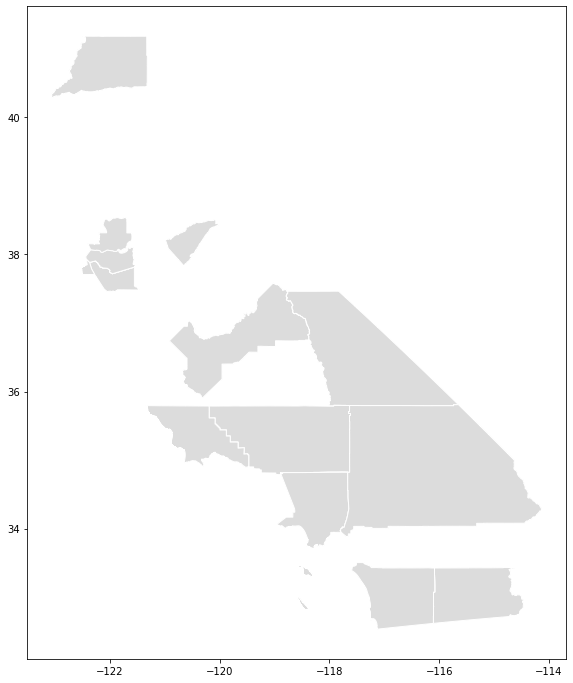

In [18]:
#plotting the data to see what it looks like at this stage. Also, adjusting colors and figure size.

clean.plot(figsize=(12,12),color='gainsboro', edgecolor='white')

In [19]:
#checking what type of data the data frame is

type(clean)

geopandas.geodataframe.GeoDataFrame

In [20]:
#Now, I want to see all the columns in this data set in order to determine which are necessary to keep.

clean.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   GEO_ID           42 non-null     object  
 1   NAME             42 non-null     object  
 2   NAICS2017        42 non-null     object  
 3   NAICS2017_LABEL  42 non-null     object  
 4   NAICS2017_F      42 non-null     object  
 5   LFO              42 non-null     object  
 6   LFO_LABEL        42 non-null     object  
 7   EMPSZES          42 non-null     object  
 8   EMPSZES_LABEL    42 non-null     object  
 9   YEAR             42 non-null     object  
 10  ESTAB            42 non-null     object  
 11  PAYANN           42 non-null     object  
 12  PAYANN_N         42 non-null     object  
 13  PAYQTR1          42 non-null     object  
 14  PAYQTR1_N        42 non-null     object  
 15  EMP              42 non-null     object  
 16  EMP_N            42 non-null     objec

In [21]:
#dropping certain columns that are unneccessary. I only need the geoID, name, job title, employment count, and geometry.

desired_columns = ['GEO_ID', 'NAME', 'NAICS2017_LABEL','EMP', 'geometry']

clean[desired_columns]

,GEO_ID,NAME,NAICS2017_LABEL,EMP,geometry
0,0500000US06001,"Alameda County, California",Wind electric power generation,47,"POLYGON ((-122.27125 37.90503, -122.27061 37.9..."
1,0500000US06013,"Contra Costa County, California",Hydroelectric power generation,5,"POLYGON ((-121.57386 38.09003, -121.57398 38.0..."
2,0500000US06013,"Contra Costa County, California",Hydroelectric power generation,N,"POLYGON ((-121.57386 38.09003, -121.57398 38.0..."
3,0500000US06013,"Contra Costa County, California",Solar electric power generation,72,"POLYGON ((-121.57386 38.09003, -121.57398 38.0..."
4,0500000US06019,"Fresno County, California",Hydroelectric power generation,100,"POLYGON ((-119.01993 37.58366, -119.02072 37.5..."
5,0500000US06019,"Fresno County, California",Hydroelectric power generation,N,"POLYGON ((-119.01993 37.58366, -119.02072 37.5..."
6,0500000US06025,"Imperial County, California",Geothermal electric power generation,350,"POLYGON ((-114.62828 33.43034, -114.62815 33.4..."
7,0500000US06025,"Imperial County, California",Geothermal electric power generation,N,"POLYGON ((-114.62828 33.43034, -114.62815 33.4..."
8,0500000US06027,"Inyo County, California",Hydroelectric power generation,33,"POLYGON ((-117.72828 37.38789, -117.77311 37.4..."
9,0500000US06029,"Kern County, California",Wind electric power generation,178,"POLYGON ((-117.63342 35.79680, -117.67143 35.7..."


In [22]:
#creating a new data frame, clean_trimmed, which only contains the 5 columns I want to conserve. 

clean_trimmed = clean[desired_columns].copy()
clean_trimmed

,GEO_ID,NAME,NAICS2017_LABEL,EMP,geometry
0,0500000US06001,"Alameda County, California",Wind electric power generation,47,"POLYGON ((-122.27125 37.90503, -122.27061 37.9..."
1,0500000US06013,"Contra Costa County, California",Hydroelectric power generation,5,"POLYGON ((-121.57386 38.09003, -121.57398 38.0..."
2,0500000US06013,"Contra Costa County, California",Hydroelectric power generation,N,"POLYGON ((-121.57386 38.09003, -121.57398 38.0..."
3,0500000US06013,"Contra Costa County, California",Solar electric power generation,72,"POLYGON ((-121.57386 38.09003, -121.57398 38.0..."
4,0500000US06019,"Fresno County, California",Hydroelectric power generation,100,"POLYGON ((-119.01993 37.58366, -119.02072 37.5..."
5,0500000US06019,"Fresno County, California",Hydroelectric power generation,N,"POLYGON ((-119.01993 37.58366, -119.02072 37.5..."
6,0500000US06025,"Imperial County, California",Geothermal electric power generation,350,"POLYGON ((-114.62828 33.43034, -114.62815 33.4..."
7,0500000US06025,"Imperial County, California",Geothermal electric power generation,N,"POLYGON ((-114.62828 33.43034, -114.62815 33.4..."
8,0500000US06027,"Inyo County, California",Hydroelectric power generation,33,"POLYGON ((-117.72828 37.38789, -117.77311 37.4..."
9,0500000US06029,"Kern County, California",Wind electric power generation,178,"POLYGON ((-117.63342 35.79680, -117.67143 35.7..."


Great, looks like it worked! Now I'd like to rename the columns to be more intuitive.

In [23]:
#generating a list of the names of each column

list(clean_trimmed)

['GEO_ID', 'NAME', 'NAICS2017_LABEL', 'EMP', 'geometry']

In [24]:
#renaming the column "NAICS2017" as "JOBTYPE"

clean_trimmed.columns = ['GEO_ID', 'NAME', 'JOBTYPE', 'EMP', 'geometry']

In [25]:
#Testing to see if it worked

clean_trimmed

,GEO_ID,NAME,JOBTYPE,EMP,geometry
0,0500000US06001,"Alameda County, California",Wind electric power generation,47,"POLYGON ((-122.27125 37.90503, -122.27061 37.9..."
1,0500000US06013,"Contra Costa County, California",Hydroelectric power generation,5,"POLYGON ((-121.57386 38.09003, -121.57398 38.0..."
2,0500000US06013,"Contra Costa County, California",Hydroelectric power generation,N,"POLYGON ((-121.57386 38.09003, -121.57398 38.0..."
3,0500000US06013,"Contra Costa County, California",Solar electric power generation,72,"POLYGON ((-121.57386 38.09003, -121.57398 38.0..."
4,0500000US06019,"Fresno County, California",Hydroelectric power generation,100,"POLYGON ((-119.01993 37.58366, -119.02072 37.5..."
5,0500000US06019,"Fresno County, California",Hydroelectric power generation,N,"POLYGON ((-119.01993 37.58366, -119.02072 37.5..."
6,0500000US06025,"Imperial County, California",Geothermal electric power generation,350,"POLYGON ((-114.62828 33.43034, -114.62815 33.4..."
7,0500000US06025,"Imperial County, California",Geothermal electric power generation,N,"POLYGON ((-114.62828 33.43034, -114.62815 33.4..."
8,0500000US06027,"Inyo County, California",Hydroelectric power generation,33,"POLYGON ((-117.72828 37.38789, -117.77311 37.4..."
9,0500000US06029,"Kern County, California",Wind electric power generation,178,"POLYGON ((-117.63342 35.79680, -117.67143 35.7..."


Success! NAICS2017 is now showing up as JOBTYPE. Now I want to get rid of the rows where employment is N (for "null").

In [26]:
#dropping all rows in the data frame where the value in the "EMP" column is equal to N

clean_trimmed2 = clean_trimmed[clean_trimmed.EMP != 'N']
clean_trimmed2

,GEO_ID,NAME,JOBTYPE,EMP,geometry
0,0500000US06001,"Alameda County, California",Wind electric power generation,47,"POLYGON ((-122.27125 37.90503, -122.27061 37.9..."
1,0500000US06013,"Contra Costa County, California",Hydroelectric power generation,5,"POLYGON ((-121.57386 38.09003, -121.57398 38.0..."
3,0500000US06013,"Contra Costa County, California",Solar electric power generation,72,"POLYGON ((-121.57386 38.09003, -121.57398 38.0..."
4,0500000US06019,"Fresno County, California",Hydroelectric power generation,100,"POLYGON ((-119.01993 37.58366, -119.02072 37.5..."
6,0500000US06025,"Imperial County, California",Geothermal electric power generation,350,"POLYGON ((-114.62828 33.43034, -114.62815 33.4..."
8,0500000US06027,"Inyo County, California",Hydroelectric power generation,33,"POLYGON ((-117.72828 37.38789, -117.77311 37.4..."
9,0500000US06029,"Kern County, California",Wind electric power generation,178,"POLYGON ((-117.63342 35.79680, -117.67143 35.7..."
13,0500000US06037,"Los Angeles County, California",Hydroelectric power generation,7,"POLYGON ((-117.66733 34.79317, -117.66748 34.8..."
14,0500000US06037,"Los Angeles County, California",Hydroelectric power generation,7,"POLYGON ((-118.53891 32.98008, -118.53895 32.9..."
15,0500000US06037,"Los Angeles County, California",Hydroelectric power generation,7,"POLYGON ((-118.32203 33.34415, -118.32272 33.3..."


No more rows with "N"! Now I would like to check what type of data is in each column, in order to make sure EMP is registering as an integer.

In [27]:
#using the print command to see data types

print(clean_trimmed2.dtypes)

GEO_ID        object
NAME          object
JOBTYPE       object
EMP           object
geometry    geometry
dtype: object


EMP is an object. I need to change it to an integer.

In [42]:
#changing EMP to an integer. I found this code on stack overflow; must first convert it to a string variable and then to an integer.

clean_trimmed2['EMP'] = clean_trimmed2['EMP'].astype(str).astype(int)

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [43]:
#testing to see whether EMP successfully changed.

print(clean_trimmed2.dtypes)

GEO_ID        object
NAME          object
JOBTYPE       object
EMP            int64
geometry    geometry
dtype: object


In [ ]:
Huzzah! EMP is now an integer. Now I need to combine the rows that have overlapping counties, in order to not generate duplications in my map. 

In [45]:
#I want to see how many different variables exist in the JOBTYPE column.

clean_trimmed2.JOBTYPE.unique()

array(['Wind electric power generation', 'Hydroelectric power generation',
       'Solar electric power generation',
       'Geothermal electric power generation',
       'Other electric power generation'], dtype=object)

In [46]:
#create new geopandas dataframe with just the NAME, geometry, and EMP columns. 

clean_counties = clean_trimmed2[['NAME', 'geometry', 'EMP']]

#dissolve rows and sum EMP.
clean_counties = clean_counties.dissolve(by= 'NAME', aggfunc= 'sum')

#check to see what the data looks like. 
clean_counties.head(25)

,geometry,EMP
NAME,,
"Alameda County, California","POLYGON ((-122.27125 37.90503, -122.27061 37.9...",47
"Contra Costa County, California","POLYGON ((-121.57398 38.09070, -121.57386 38.0...",77
"Fresno County, California","POLYGON ((-119.01993 37.58366, -119.02072 37.5...",100
"Imperial County, California","POLYGON ((-114.62828 33.43034, -114.62815 33.4...",350
"Inyo County, California","POLYGON ((-117.72828 37.38789, -117.77311 37.4...",33
"Kern County, California","POLYGON ((-117.63342 35.79680, -117.67143 35.7...",178
"Los Angeles County, California","MULTIPOLYGON (((-118.53895 32.98009, -118.5389...",630
"Orange County, California","POLYGON ((-120.01792 38.43586, -120.02877 38.4...",203
"San Bernardino County, California","POLYGON ((-115.41904 35.62925, -115.41359 35.6...",282


Now that employment has been dissolved into total employment per county, I want to add back in the individual JOBTYPE employment counts.

I'm going to do this by creating new columns for each value in JOBTYPE.

In [47]:
#creating new data frame job_types, which equals the unique values of JOBTYPE
#the clean_trimmed2.JOBTYPE.unique() function pulls up the unique JOBTYPE values in the clean_trimmed2 dataframe
job_types = clean_trimmed2.JOBTYPE.unique()

#create a "for" loop that creates a new column in clean_counties called jobs that gives it a default value 0 for all rows
for job in job_types:
    clean_counties[job] = 0

clean_counties.head(10)

,geometry,EMP,Wind electric power generation,Hydroelectric power generation,Solar electric power generation,Geothermal electric power generation,Other electric power generation
NAME,,,,,,,
"Alameda County, California","POLYGON ((-122.27125 37.90503, -122.27061 37.9...",47,0,0,0,0,0
"Contra Costa County, California","POLYGON ((-121.57398 38.09070, -121.57386 38.0...",77,0,0,0,0,0
"Fresno County, California","POLYGON ((-119.01993 37.58366, -119.02072 37.5...",100,0,0,0,0,0
"Imperial County, California","POLYGON ((-114.62828 33.43034, -114.62815 33.4...",350,0,0,0,0,0
"Inyo County, California","POLYGON ((-117.72828 37.38789, -117.77311 37.4...",33,0,0,0,0,0
"Kern County, California","POLYGON ((-117.63342 35.79680, -117.67143 35.7...",178,0,0,0,0,0
"Los Angeles County, California","MULTIPOLYGON (((-118.53895 32.98009, -118.5389...",630,0,0,0,0,0
"Orange County, California","POLYGON ((-120.01792 38.43586, -120.02877 38.4...",203,0,0,0,0,0
"San Bernardino County, California","POLYGON ((-115.41904 35.62925, -115.41359 35.6...",282,0,0,0,0,0


Now I am going to create a "for" loop to iterate through each row and add the EMP values to each job type column. I would like to transpose the data from rows to column values. We cannot use the merge function because merge transfers data between columns. 

In [48]:
# create a for loop to iterate through each row and run the following code. 
for index, row in clean_counties.iterrows():
    
    #define a new variable that returns a dataframe which includes only 
    # the rows in ffjobs_trimmed2 equal to a particular NAME in the ffjobs_counties dataframe.
    # for example, all the LA county rows in the ffjobs_trimmed2 dataframe where 
    # the county NAME is equal to a particular county NAME value in the ffjobs_counties dataframe. 
    
    countyrows = clean_trimmed2[clean_trimmed2['NAME'] == index]
    
    #now, let's create another loop ( a loop within a loop!)
    # this loop says for a new varaiable trimmed_index, iterate through each row in the countrows datagrame we created above
    for trimmed_index, trimmed_row in countyrows.iterrows():
        # where the value in the ffjobs_counties row is equal to the value of ffjobs_trimmed2 JOBTYPE,
        # we set equal to the employment value for that JOBTYPE in the ffjobs_trimmed2 dataframe. 
        row[trimmed_row.JOBTYPE] = trimmed_row.EMP
        clean_counties.loc[[index], trimmed_row.JOBTYPE] = trimmed_row.EMP

#check the results
clean_counties.head()    
    
    

,geometry,EMP,Wind electric power generation,Hydroelectric power generation,Solar electric power generation,Geothermal electric power generation,Other electric power generation
NAME,,,,,,,
"Alameda County, California","POLYGON ((-122.27125 37.90503, -122.27061 37.9...",47,47,0,0,0,0
"Contra Costa County, California","POLYGON ((-121.57398 38.09070, -121.57386 38.0...",77,0,5,72,0,0
"Fresno County, California","POLYGON ((-119.01993 37.58366, -119.02072 37.5...",100,0,100,0,0,0
"Imperial County, California","POLYGON ((-114.62828 33.43034, -114.62815 33.4...",350,0,0,0,350,0
"Inyo County, California","POLYGON ((-117.72828 37.38789, -117.77311 37.4...",33,0,33,0,0,0


In [49]:
#looking at the entire data frame

clean_counties

,geometry,EMP,Wind electric power generation,Hydroelectric power generation,Solar electric power generation,Geothermal electric power generation,Other electric power generation
NAME,,,,,,,
"Alameda County, California","POLYGON ((-122.27125 37.90503, -122.27061 37.9...",47,47,0,0,0,0
"Contra Costa County, California","POLYGON ((-121.57398 38.09070, -121.57386 38.0...",77,0,5,72,0,0
"Fresno County, California","POLYGON ((-119.01993 37.58366, -119.02072 37.5...",100,0,100,0,0,0
"Imperial County, California","POLYGON ((-114.62828 33.43034, -114.62815 33.4...",350,0,0,0,350,0
"Inyo County, California","POLYGON ((-117.72828 37.38789, -117.77311 37.4...",33,0,33,0,0,0
"Kern County, California","POLYGON ((-117.63342 35.79680, -117.67143 35.7...",178,178,0,0,0,0
"Los Angeles County, California","MULTIPOLYGON (((-118.53895 32.98009, -118.5389...",630,0,7,198,0,5
"Orange County, California","POLYGON ((-120.01792 38.43586, -120.02877 38.4...",203,0,0,203,0,0
"San Bernardino County, California","POLYGON ((-115.41904 35.62925, -115.41359 35.6...",282,120,0,162,0,0


Awesome! Now time to map!

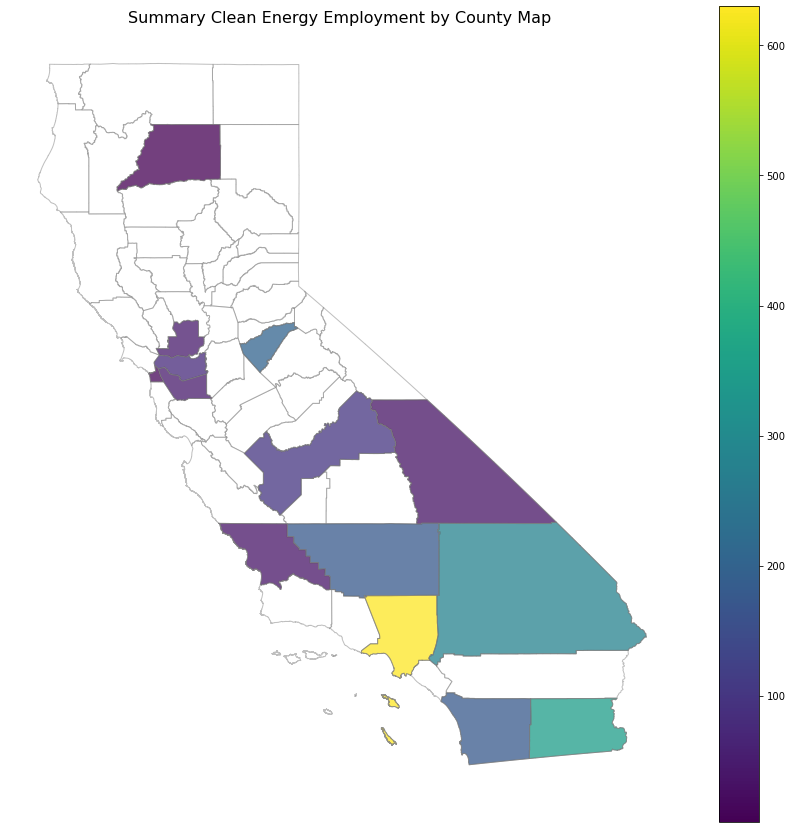

In [50]:
#I will map data by county by using subplots to create multiple layered maps.
fig, ax = plt.subplots(figsize=(15, 15))

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Summary Clean Energy Employment by County Map ',fontsize=16)

# add a basemap
counties.plot(alpha=0.5, color = 'white', edgecolor ='grey', ax=ax)

# plot employment values for ffjobs
clean_counties.plot(column = 'EMP',
            alpha=0.75, 
            legend = True, 
            linewidth = 1, 
            edgecolor='grey',
            figsize=(12,10),
            ax=ax)


White counties have no clean energy jobs. The lightest color counties have the highest number of clean energy jobs. I set the boundaries to grey for aesthetic purposes. Now I'm going to visualize some of the data subsets side by side.

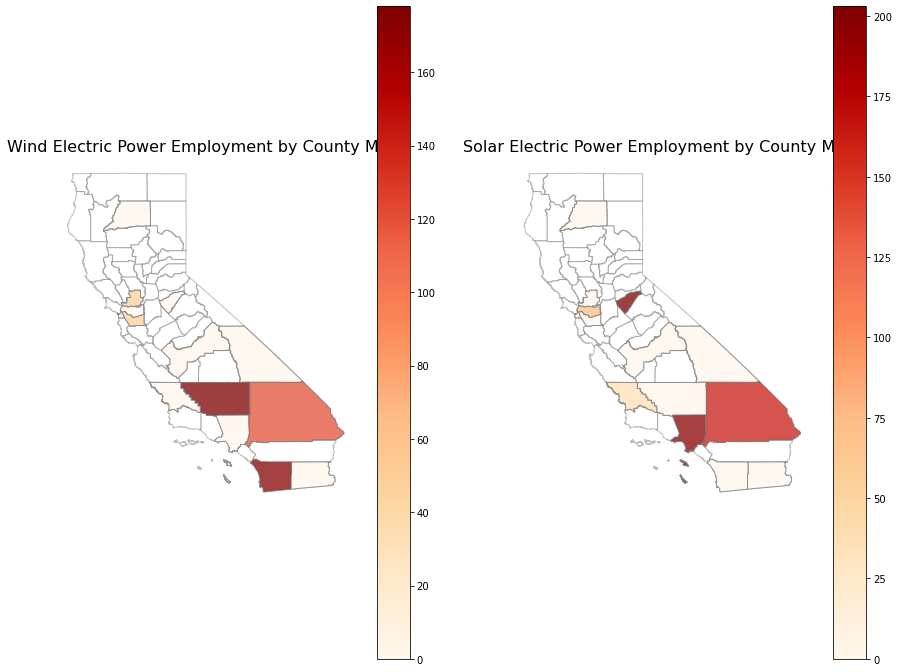

In [52]:
# use subplots that make it easier to create multiple layered maps
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# turn the axis off
ax1.axis('off')
ax2.axis('off')

# set a title for ax1
ax1.set_title('Wind Electric Power Employment by County Map ',fontsize=16)

# add a basemap
counties.plot(alpha=0.5, color = 'white', edgecolor ='grey', ax=ax1)

# define wind electric power variable
# wind = clean_counties[clean_counties == 'Wind Electric Power generation']

# plot EMPlOYMENT values for Wind electric power 
clean_counties.plot(column = 'Wind electric power generation',
            alpha=0.75, 
            legend = True, 
            linewidth = 1, 
            cmap = 'OrRd', 
            edgecolor='grey',
            figsize=(12,10), ax=ax1)


# set a title for ax2
ax2.set_title('Solar Electric Power Employment by County Map ',fontsize=16)

# add a basemap
counties.plot(alpha=0.5, color = 'white', edgecolor ='grey', ax=ax2)

# define Solar electric power variable
# solar = clean_trimmed2[clean_trimmed2.JOBTYPE_NAICS == 'solar electric power generation']

# plot EMP values for solar electric power generation
clean_counties.plot(column = 'Solar electric power generation',
            alpha=0.75, 
            legend = True, 
            linewidth = 1, 
            cmap = 'OrRd', 
            edgecolor='grey',
            figsize=(12,10),
            ax=ax2)

Now I'll try to plot the data from counties with over 500 clean energy jobs per county.

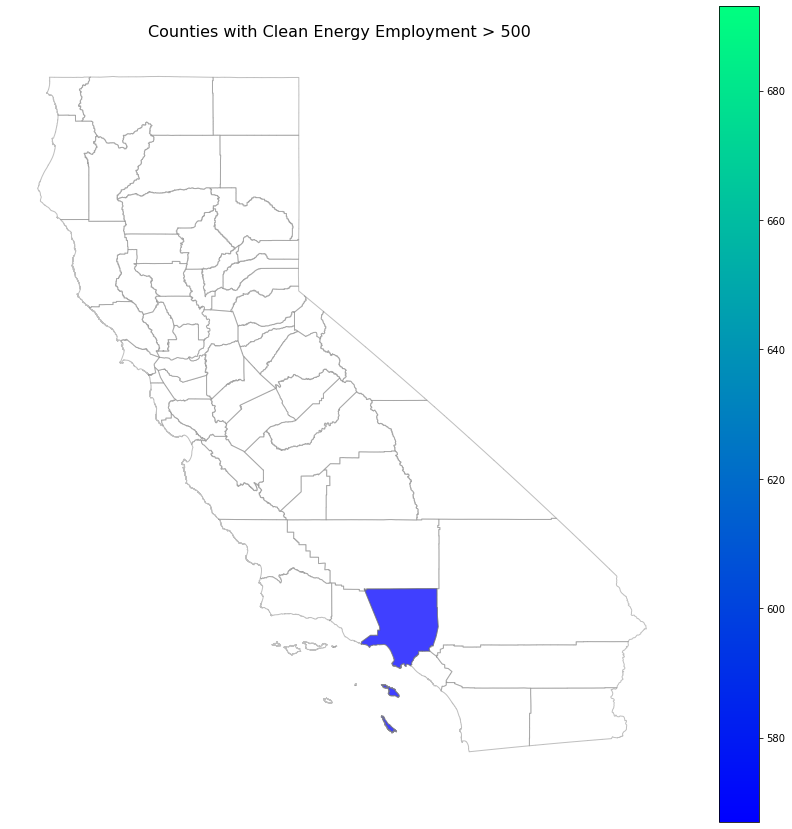

In [53]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Counties with Clean Energy Employment > 500 ',fontsize=16)

# add a basemap
counties.plot(alpha=0.5, color = 'white', edgecolor ='grey', ax=ax)

# plot all of the values where EMP is greater than 500 using the noN variable, which excludes all N values. 
clean_counties[clean_counties['EMP'] > 500].plot(column = 'EMP',
            alpha=0.75, 
            legend = True, 
            linewidth = 1, 
            cmap = 'winter', 
            edgecolor='grey',
            figsize=(12,10),                                     
            ax=ax)


This plot shows just the counties where clean energy employment > 500. It looks like it's just LA County. 